In [1]:
from plotting.plot_utils import get_logtable, set_rc_params
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
set_rc_params()

# Extract Data From Before Growing

In [2]:
databse_name = "fehring_growing_nn"
table_name = "blackbox_incumbent_gen"

In [3]:
smac_costs = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-16 11:09:36,009  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:36,009  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:36,009  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:36,010  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:36,010  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:36,010  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:36,011  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:36,011  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:36,011  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:36,012  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 11:09:36,015  | py-experimenter - INFO     | 0 keys loaded from agent
2024-07-16 11:09:36,082  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 11:09:36,228  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 11:09:36,347  | py-experimenter - INFO     | Opening tunnel: 127.0.0.1:3306 <> 127.0.0.1:3306
2024-07-16 11:09:36,440  | py-experimenter - INFO     | Initialized and connected to database


In [4]:
# Select Row with Minimal Cost
grow_once_cost = smac_costs[smac_costs["experiment_id"] == 1]
grow_once_minimal_cost_row = smac_costs.loc[smac_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"]
minimal_cost = grow_once_minimal_cost_row["cost"]

In [5]:
# Get Training Process Logtable
training_process_logtable = "training_process"
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-16 11:09:36,604  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:36,604  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:36,604  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:36,604  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:36,605  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:36,605  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:36,605  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:36,605  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:36,605  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:36,606  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 11:09:36,677  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 11:09:36,823  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 11:09:36,903  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-16 11:09:36,903  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-16 11:09:36,903  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-16 11:09:36,904  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-16 11:09:36,904  | py-experimenter - INFO     | Closing all open connections...
2024-07-16 11:09:36,904  | py-experimenter - WARNING  | Tunnels are not started. Please .s

In [6]:
# Select entries 
relevat_training_process_before_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
relevat_training_process_before_growth

,ID,experiment_id,timestamp,worker_id,trial_number,budget,timestep,evaluated_cost,evaluated_stdev
8900,8901,3,2024-07-10 23:42:38,2,39,None,50000,-1.964,0.038781
8901,8902,3,2024-07-10 23:42:38,2,39,None,100000,-1.080,1.120040
8902,8903,3,2024-07-10 23:42:38,2,39,None,150000,-0.869,1.106260
8903,8904,3,2024-07-10 23:42:38,2,39,None,200000,-0.780,1.230020
8904,8905,3,2024-07-10 23:42:39,2,39,None,250000,-0.794,0.972473
...,...,...,...,...,...,...,...,...,...
8995,8996,3,2024-07-10 23:45:59,4,39,None,800000,0.800,0.400000
8996,8997,3,2024-07-10 23:46:00,4,39,None,850000,1.000,0.000000
8997,8998,3,2024-07-10 23:46:00,4,39,None,900000,1.000,0.000000
8998,8999,3,2024-07-10 23:46:00,4,39,None,950000,1.000,0.000000


<Axes: xlabel='timestep', ylabel='evaluated_cost'>

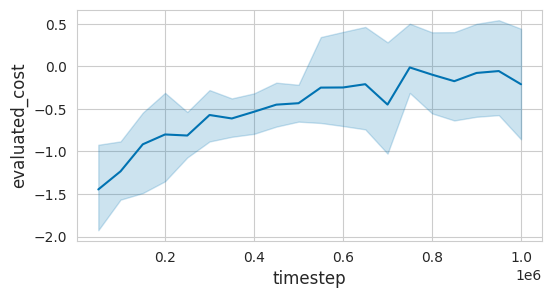

In [7]:
# SNS plot training proccess. "timestep" on x, "evalauted_cost on y"
sns.lineplot(data=relevat_training_process_before_growth, x="timestep", y="evaluated_cost")

# Add Grow Once Data

In [8]:
table_name = "net2deeper_grow_once"

In [9]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")
smac_grow_once_costs = grow_once_cost[grow_once_cost["experiment_id"] == 4]


2024-07-16 11:09:37,436  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:37,436  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:37,437  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:37,437  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:37,437  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:37,437  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:37,437  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:37,438  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:37,438  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:37,438  | py-experimenter - WARNING  | No values given for keyfield total_time

In [10]:
# select row with minimal cost
grow_once_minimal_cost_row = grow_once_cost.loc[smac_grow_once_costs["cost"].idxmin()]
minimal_cost_experiment_id = grow_once_minimal_cost_row["experiment_id"]
minimal_cost_trial = grow_once_minimal_cost_row["trial_number"]
minimal_cost = grow_once_minimal_cost_row["cost"]


In [11]:
training_process_after_growth = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-16 11:09:37,955  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:37,956  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:37,956  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:37,956  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:37,956  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:37,957  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:37,957  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:37,957  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:37,957  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:37,957  | py-experimenter - WARNING  | No values given for keyfield total_time

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

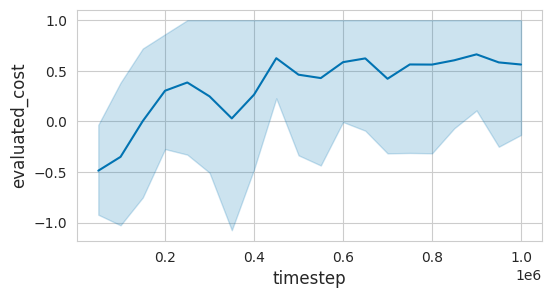

In [12]:
# Plot training process after growth
relevat_training_process_after_growth = training_process_after_growth[(training_process_after_growth["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_growth["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

2024-07-16 11:09:38,676  | py.warnings - WARNING  | /tmp/ipykernel_369305/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-16 11:09:38,676  | py.warnings - WARNING  | /tmp/ipykernel_369305/1429544113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()

2024-07-16 11:09

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

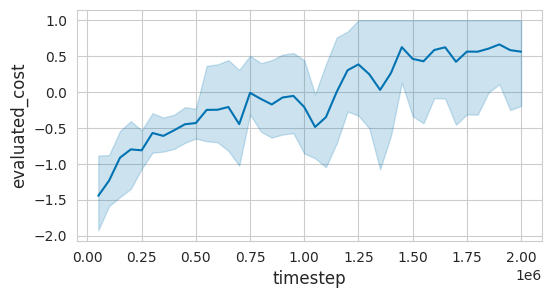

In [13]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
relevat_training_process_after_growth["timestep"] += relevat_training_process_before_growth["timestep"].max()
combined_growed = pd.concat([relevat_training_process_before_growth, relevat_training_process_after_growth])
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost")

# Add Baseline

In [14]:
table_name = "hpo_warmstart"

In [15]:
grow_once_cost = get_logtable(databse_name, table_name, "smac_callbacks", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")
smac_cost_warmstarting = grow_once_cost[grow_once_cost["experiment_id"] == 4]

2024-07-16 11:09:38,995  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:38,995  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:38,995  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:38,996  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 11:09:38,998  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__smac_callbacks
2024-07-16 11:09:38,998  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__final_evaluation_callback
2024-07-16 11:09:38,998  | py-experimenter - INFO     | Found logtable blackbox_incumbent_gen__training_losses
2024-07-16 11:09:38,999  | py-experimenter - WARNING  | No custom section defined in config
2024-07-16 11:09:39,000  | py-experimenter - WARNING  | No codecarbon section defined in config
2024-07-16 11:09:39,001  | py-experimenter - INFO     | 0 keys loaded from agent
2024-07-16 11:09:39,067  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 11:09:39,214  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 11:09:39,293  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
20

In [16]:
# Remove incumbent because of odd behaviour
samc_cost_warmstarting_incumbent = smac_cost_warmstarting["cost"].idxmin()
smac_cost_warmstarting = smac_cost_warmstarting.drop(samc_cost_warmstarting_incumbent)

In [17]:
samc_cost_warmstarting_incumbent

29

In [18]:

samc_cost_warmstarting_row = smac_cost_warmstarting.loc[smac_cost_warmstarting["cost"].idxmin()]
minimal_cost_experiment_id = samc_cost_warmstarting_row["experiment_id"]
minimal_cost_trial = samc_cost_warmstarting_row["trial_number"]
minimal_cost = samc_cost_warmstarting_row["cost"]

In [19]:
training_process_after_warmstarting = get_logtable(databse_name, table_name, "training_process", "baselines/blackbox_only_hpo/config/blackbox_only_hpo.yaml")

2024-07-16 11:09:39,528  | py-experimenter - WARNING  | No values given for keyfield environment_id
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield env_seed
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield model_save_path
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield observation_keys
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield max_episode_steps
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield parallel_vec_envs
2024-07-16 11:09:39,529  | py-experimenter - WARNING  | No values given for keyfield seed
2024-07-16 11:09:39,530  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_episodes
2024-07-16 11:09:39,530  | py-experimenter - WARNING  | No values given for keyfield n_evaluation_rounds
2024-07-16 11:09:39,530  | py-experimenter - WARNING  | No values given for keyfield total_time

2024-07-16 11:09:39,600  | py-experimenter - INFO     | 1 key(s) loaded
2024-07-16 11:09:39,749  | py-experimenter - INFO     | Connecting to gateway: apollo.ai.uni-hannover.de:22 as user 'fehring'
2024-07-16 11:09:39,827  | py-experimenter - ERROR    | Problem setting SSH Forwarder up: Couldn't open tunnel 127.0.0.1:3306 <> 127.0.0.1:3306 might be in use or destination not reachable
2024-07-16 11:09:39,827  | py-experimenter - WARNING  | Failed at creating SSH tunnel. Maybe the tunnel is already active in other process?
2024-07-16 11:09:39,827  | py-experimenter - WARNING  | An error occurred while opening tunnels.
2024-07-16 11:09:39,828  | py-experimenter - WARNING  | It looks like you didn't call the .stop() before the SSHTunnelForwarder obj was collected by the garbage collector! Running .stop(force=True)
2024-07-16 11:09:39,828  | py-experimenter - INFO     | Closing all open connections...
2024-07-16 11:09:39,828  | py-experimenter - WARNING  | Tunnels are not started. Please .s

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

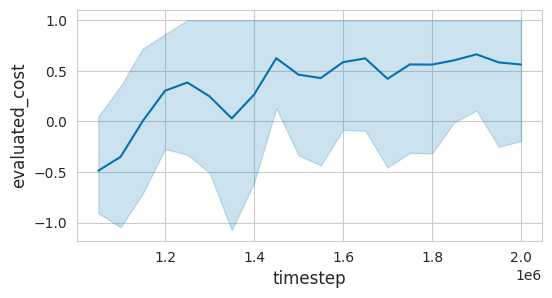

In [20]:
# Plot training process after warmstarting
training_process_after_warmstarting = training_process_after_warmstarting[(training_process_after_warmstarting["experiment_id"] == minimal_cost_experiment_id) & (training_process_after_warmstarting["trial_number"] == minimal_cost_trial)]
sns.lineplot(data=relevat_training_process_after_growth, x="timestep", y="evaluated_cost")

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

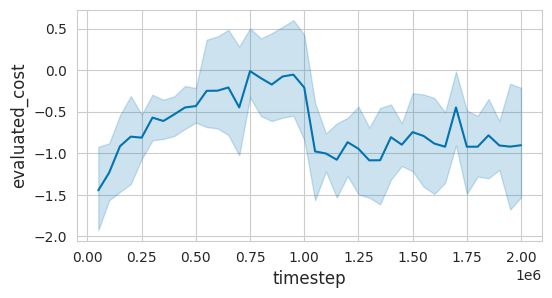

In [21]:
# Plot Combination of Before and After Growth, first concat the dataframes, and increase the timestep of the second dataframe by the maximum timestep of the first dataframe
training_process_after_warmstarting["timestep"] += training_process_after_warmstarting["timestep"].max()
combined_warmstarted = pd.concat([relevat_training_process_before_growth, training_process_after_warmstarting])
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost")

# Compare Warmstarting and Growth

<Axes: xlabel='timestep', ylabel='evaluated_cost'>

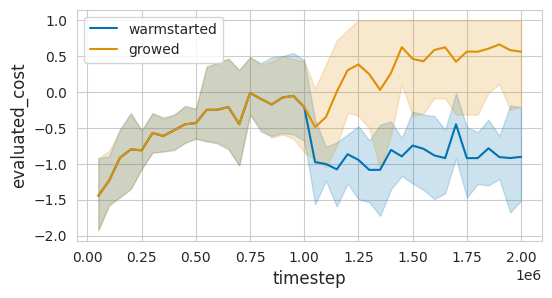

In [22]:
sns.lineplot(data=combined_warmstarted, x="timestep", y="evaluated_cost", label="warmstarted")
sns.lineplot(data=combined_growed, x="timestep", y="evaluated_cost", label="growed")
